# Lab 6: Time Series Data Vis Exercises

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

import plotly.express as px

In [2]:
# extracting stock data from yahoo finance
# Define the stock ticker symbol and the time period

google_stock = yf.download('GOOG', start='2021-01-01', end='2024-10-01')
google_stock = google_stock[["Close"]] # only focus on the values at the market close
# Reset the index to make the date a column
google_stock = google_stock.reset_index()

# Display the first few rows
print(google_stock.tail())
google_stock.shape

[*********************100%***********************]  1 of 1 completed

          Date       Close
936 2024-09-24  163.639999
937 2024-09-25  162.990005
938 2024-09-26  163.830002
939 2024-09-27  165.289993
940 2024-09-30  167.190002


(941, 2)

## Task 1: 
- Create a simple line plot of Google's stock close prices over time.
- Add labels for the X-axis (Date) and Y-axis (Close Price).
- Customize the plot by adding a title and adjusting the size of the figure.

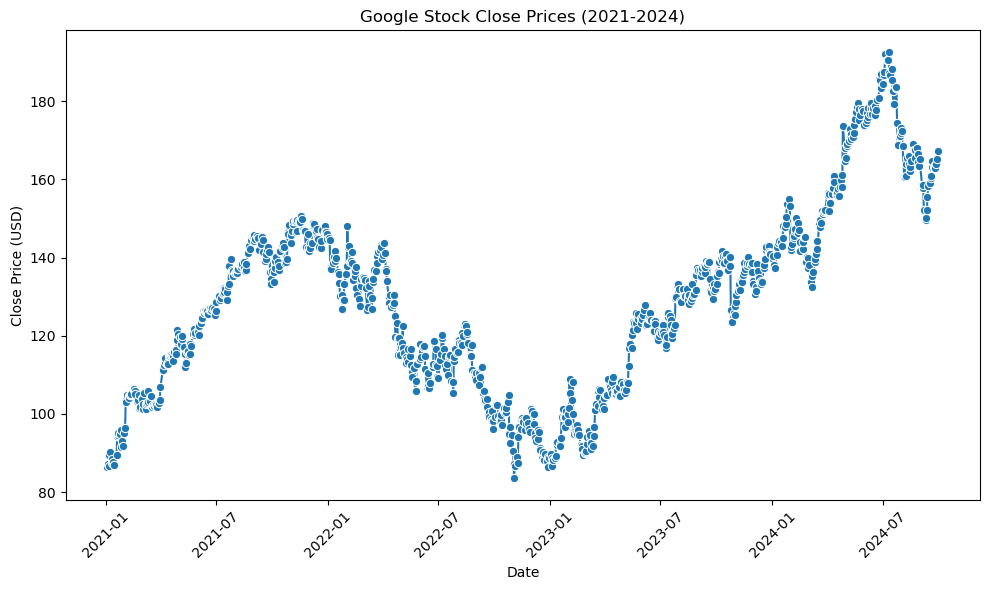

In [5]:
# Task: Plot Google's stock close prices over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=google_stock, marker="o")
plt.title('Google Stock Close Prices (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Task 2:
- Create an interactive version of the Google stock close price plot using plotly.express.
- Include markers at each data point for better interactivity.
- Customize the X-axis format to display dates correctly.

In [6]:
# Task: Create an interactive Plotly chart
fig = px.line(google_stock, x='Date', y='Close', markers=True, 
              title='Interactive Google Stock Close Prices (2021-2024)')
fig.update_layout(xaxis_title='Date', yaxis_title='Close Price (USD)', 
                  hovermode='x unified', xaxis_tickformat='%Y-%m')
fig.show()

/opt/homebrew/Caskroom/miniforge/base/envs/envp3t/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


## Task 3:
- Visualize a 30-day moving average for Google's stock prices.
- Plot both the original close prices and the 30-day moving average on the same graph.
- Use different colors and line styles to distinguish between the two.

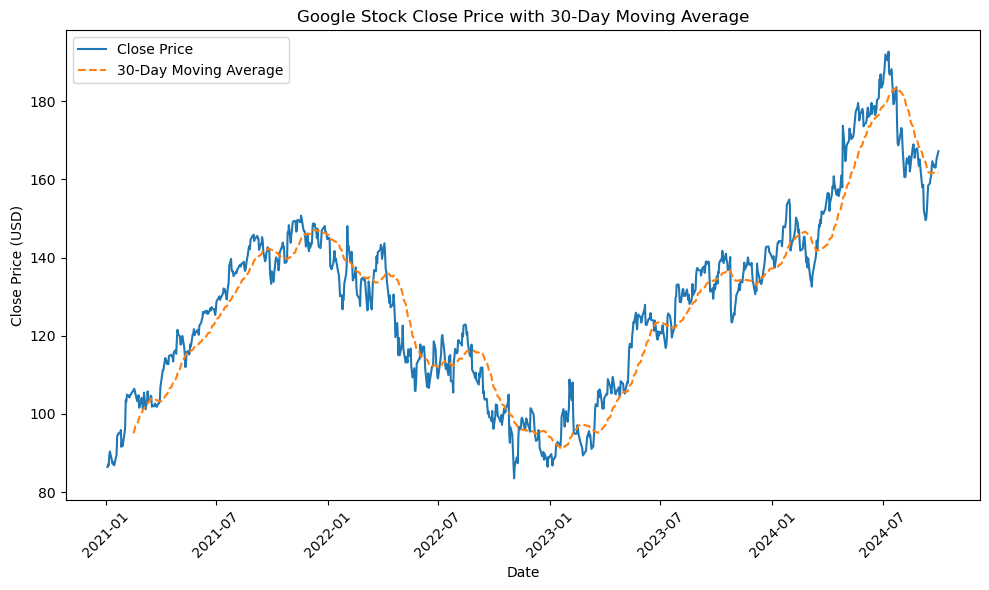

In [7]:
# Task: Calculate and plot the 30-day moving average
google_stock['30_day_MA'] = google_stock['Close'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=google_stock, label='Close Price')
sns.lineplot(x='Date', y='30_day_MA', data=google_stock, label='30-Day Moving Average', linestyle='--')
plt.title('Google Stock Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Task 4:
- Highlight significant price drops or gains in the stock data (e.g., more than a 5% change from the previous day).
- Mark these changes on the plot using scatter markers or a different color for those points.

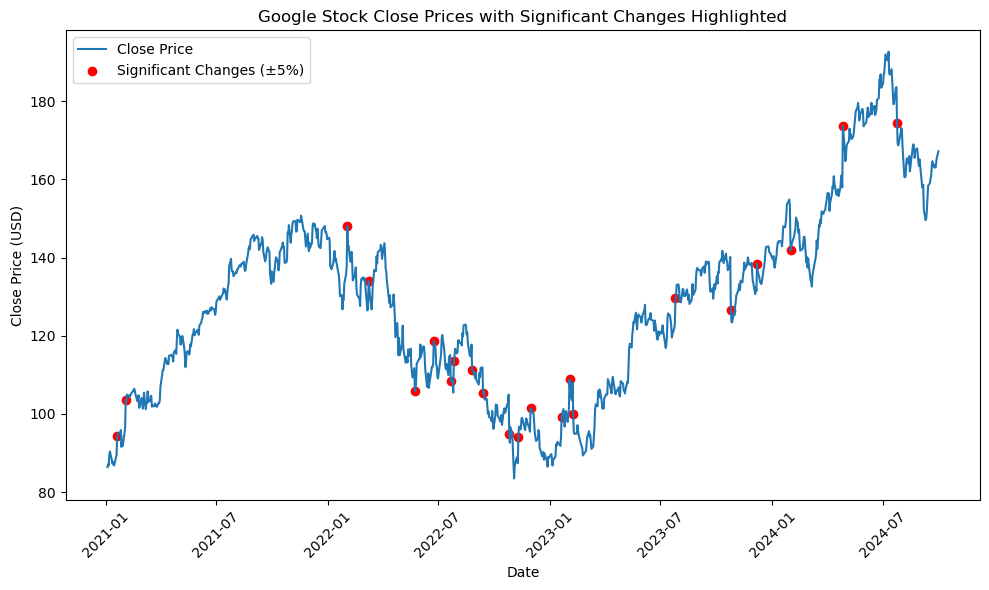

In [8]:
# Task: Identify and highlight significant changes
google_stock['Price_Change'] = google_stock['Close'].pct_change() * 100
significant_changes = google_stock[google_stock['Price_Change'].abs() > 5]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=google_stock, label='Close Price')
plt.scatter(significant_changes['Date'], significant_changes['Close'], color='red', label='Significant Changes (±5%)')
plt.title('Google Stock Close Prices with Significant Changes Highlighted')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Task 5:
- Perform and visualize a time series decomposition of the stock data into trend, seasonal, and residual components.
- Plot all components on separate subplots.

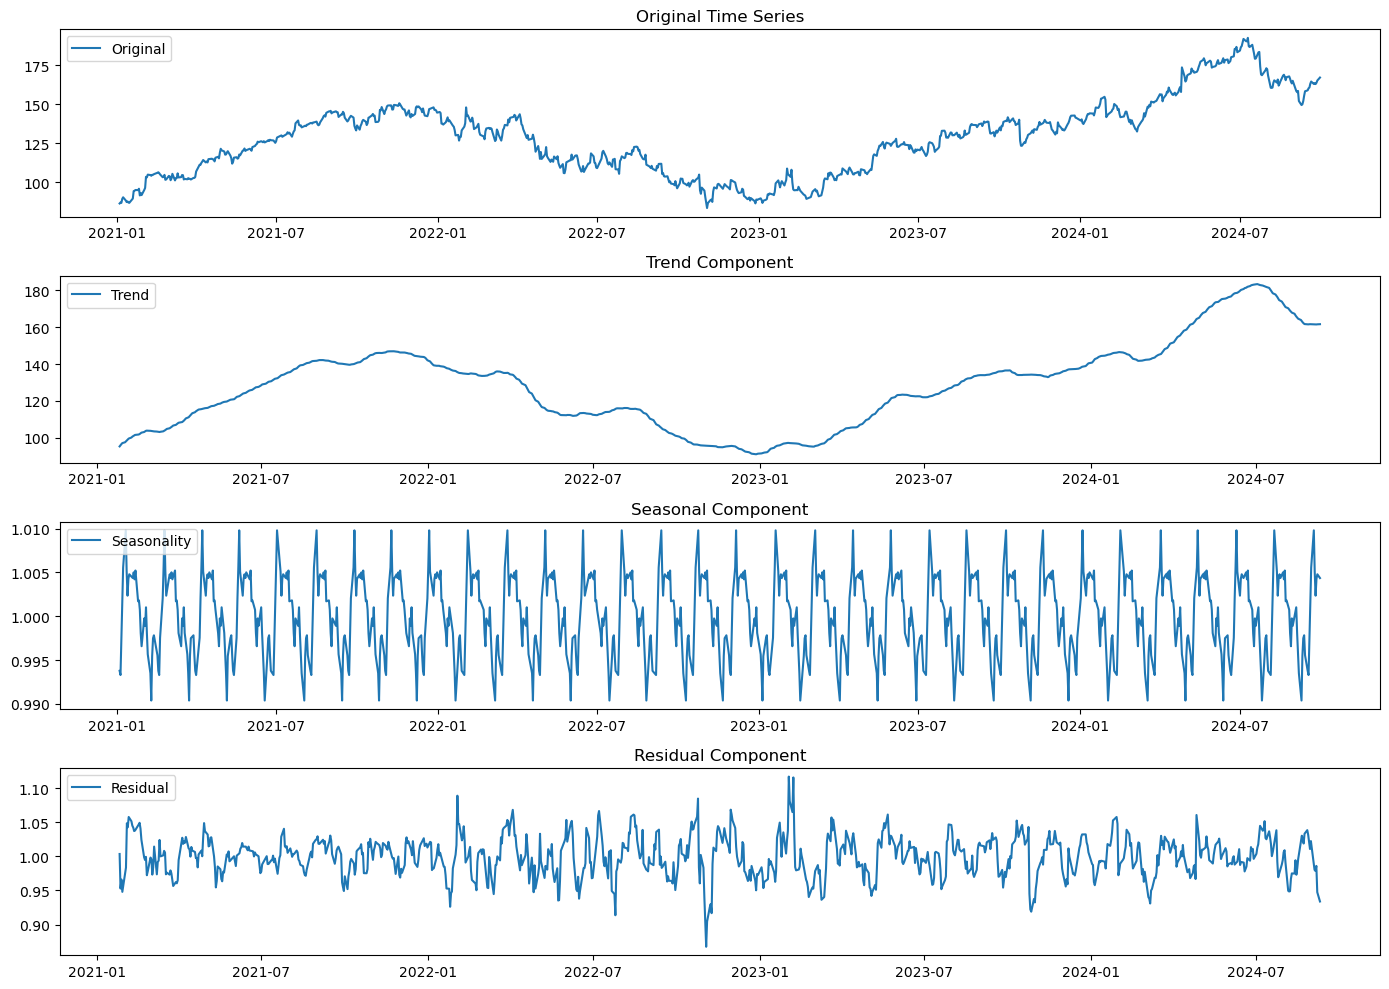

In [9]:
# Task: Perform time series decomposition
google_stock.set_index('Date', inplace=True)
decomposition = sm.tsa.seasonal_decompose(google_stock['Close'], model='multiplicative', period=30)

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(google_stock['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

## Task 6: 
- Detect anomalies in the stock prices using Z-scores or Isolation Forest.
    - Calculate the Z-scores of the stock prices to identify potential anomalies.
- Plot the stock prices and highlight the anomalies with a different color.

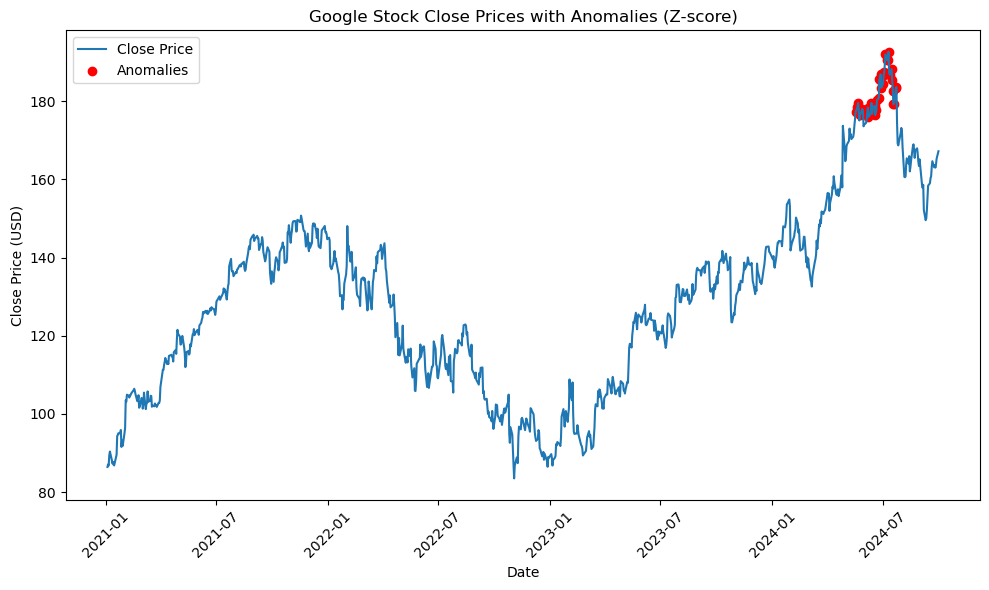

In [10]:
# Ensure 'Date' is a column by resetting the index
google_stock.reset_index(inplace=True)

# Detect anomalies using Z-scores
google_stock['z_score'] = (google_stock['Close'] - google_stock['Close'].mean()) / google_stock['Close'].std()
anomalies = google_stock[google_stock['z_score'].abs() > 2]

# Plotting the Close price and highlighting the anomalies
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=google_stock, label='Close Price')
plt.scatter(anomalies['Date'], anomalies['Close'], color='red', label='Anomalies')
plt.title('Google Stock Close Prices with Anomalies (Z-score)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
